In [11]:
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
traindf= pd.read_csv('train.csv')

In [4]:
traindf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  pdays      40000 non-null  int64 
 14  previous   40000 non-null  int64 
 15  poutcome   40000 non-null  object
 16  y          40000 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.2+ MB


In [6]:
traindf.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
traindf.describe()

,age,balance,day,duration,campaign,pdays,previous
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175,31.956075,0.417550
std,9.641776,2903.769716,8.278127,259.366498,3.239051,91.061625,2.146128
min,19.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000,-1.000000,0.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000,-1.000000,0.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,385.000000,275.000000


In [8]:
traindf.duplicated().sum()

0

In [9]:
traindf.shape

(40000, 17)

In [13]:
traindf['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

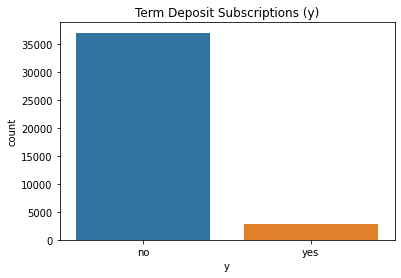

In [14]:
sns.countplot(data=traindf, x='y')
plt.title("Term Deposit Subscriptions (y)")
plt.show()

In [16]:
# Quick Look at Numeric Features Distributions
numeric_cols = traindf.select_dtypes(include=['int64', 'float64']).columns

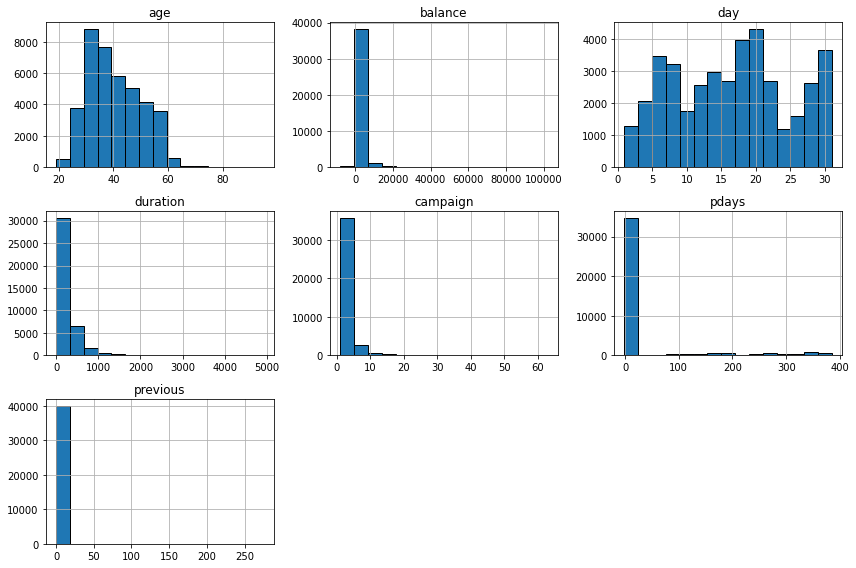

In [17]:
# Histograms for numeric columns
traindf[numeric_cols].hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.tight_layout()
plt.show()

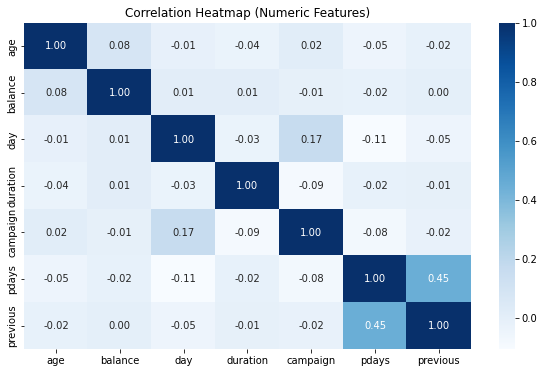

In [18]:
# Correlation Matrix

corr_matrix = traindf[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

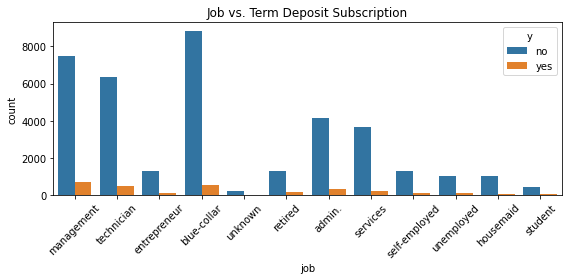

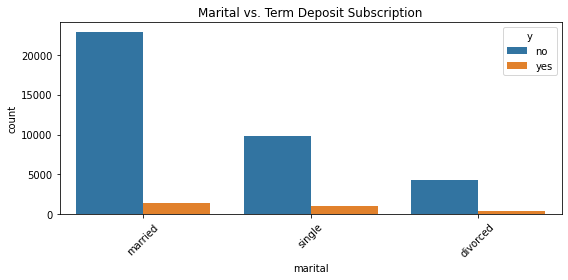

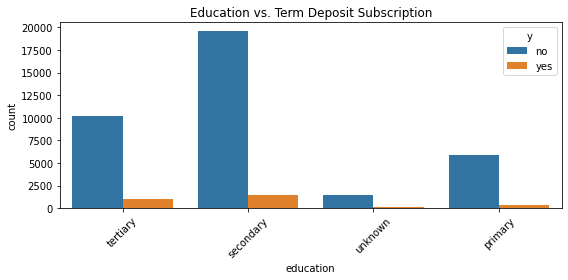

In [20]:
# Some Basic Categorical Analysis
categorical_cols = ['job', 'marital', 'education']  # add more as needed
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=traindf, x=col, hue='y')  # see distribution vs. target
    plt.title(f"{col.capitalize()} vs. Term Deposit Subscription")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

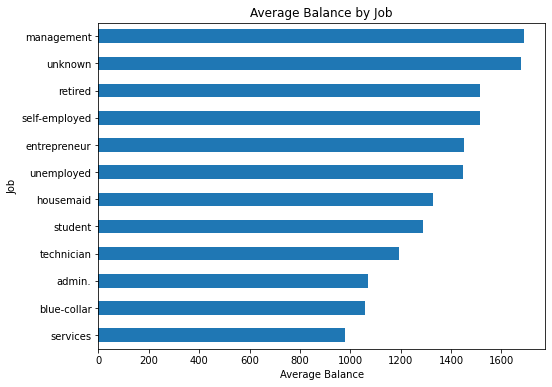

In [22]:
#Average Balance by Job
if 'job' in traindf.columns and 'balance' in traindf.columns:
    plt.figure(figsize=(8,6))
    job_balance = traindf.groupby('job')['balance'].mean().sort_values()
    job_balance.plot(kind='barh')
    plt.title("Average Balance by Job")
    plt.xlabel("Average Balance")
    plt.ylabel("Job")
    plt.show()

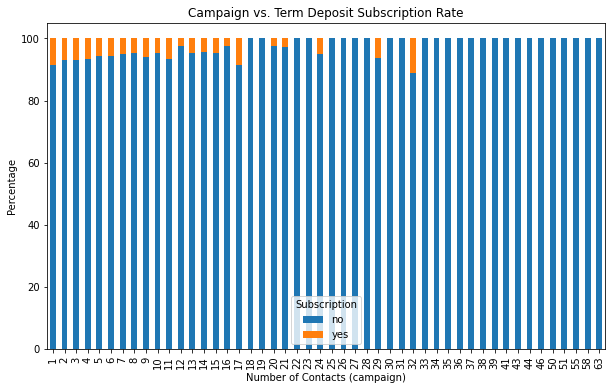

In [23]:
# (A) campaign vs. y
if 'campaign' in traindf.columns:
    campaign_outcomes = traindf.groupby('campaign')['y'].value_counts(normalize=True).unstack() * 100
    campaign_outcomes.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title("Campaign vs. Term Deposit Subscription Rate")
    plt.xlabel("Number of Contacts (campaign)")
    plt.ylabel("Percentage")
    plt.legend(title='Subscription', loc='best')
    plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import warnings

In [21]:
warnings.filterwarnings("ignore")


In [23]:
testdf=pd.read_csv('test.csv')

In [25]:
testdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0,unknown
1,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2,failure
2,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1,failure
3,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0,unknown
4,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown


In [27]:
def preprocess_data(data):
    # Encode Categorical Variables
    label_enc_cols = ['job', 'marital', 'education', 'default', 
                      'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
    le = LabelEncoder()
    for col in label_enc_cols:
        if col in data.columns:
            data[col] = le.fit_transform(data[col])
    
    # Scale Numerical Features
    numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    scaler = StandardScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
    
    return data


In [31]:
train_data = preprocess_data(traindf)


In [33]:
test_data = preprocess_data(testdf)


In [35]:
X = train_data.drop(columns=['y'])
y = train_data['y']

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [41]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [43]:
y_pred = rf_model.predict(X_val)


In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
accuracy_score(y_val, y_pred)

0.938375

In [49]:
classification_report(y_val, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97      7424\n           1       0.62      0.37      0.46       576\n\n    accuracy                           0.94      8000\n   macro avg       0.79      0.68      0.72      8000\nweighted avg       0.93      0.94      0.93      8000\n'

In [51]:
roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1])

0.9378052927068368

In [53]:
test_data['y'] = rf_model.predict(test_data)


In [57]:
test_data['y'] = test_data['y'].replace({0: 'no', 1: 'yes'}) 
submission = test_data[['y']]
submission.to_csv('submission.csv', index=False)

In [59]:
print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'
